In [2]:
# description
# https://www.kaggle.com/c/boston-housing

# TensorFlow and tf.keras

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler



In [3]:
import pandas as pd 
X_train = pd.read_csv('out_X.csv', delimiter = ',')
Y_train = pd.read_csv('out_Y.csv', delimiter = ',')

In [4]:
X_train = StandardScaler().fit_transform(X_train)
Y_train = pd.factorize(Y_train.x)[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train , Y_train, test_size=0.3, random_state=42)

In [6]:

x_train.shape, y_train.shape


((460282, 48), (460282,))

In [7]:
model = Sequential()
model.add(Dense(40, input_shape=[48], activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(11, activation='softmax'))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1960      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1025      
_________________________________________________________________
dense_2 (Dense)              (None, 11)                286       
Total params: 3,271
Trainable params: 3,271
Non-trainable params: 0
_________________________________________________________________


In [8]:
print(model.input_shape)
print(model.output_shape)
'''
(None, 13)
(None, 1)

None = 1?
1*13의 vetor가 input, 1*1의 vector가 output
1*(13+1) -> matrix 곱, 14*10, 결과: 1*(10+1) -> 11*1 matrix 곱, 결과:1*1
1은 **batch_size, 훈련 instance개수다. 100이 되면 100개의 instance를 한번에 input으로 넣을 수 있다.
데이터 개수에 따라 달라지므로 그냥 정해지지 않았다는 의미로 None이 들어간다.
'''

(None, 48)
(None, 11)


'\n(None, 13)\n(None, 1)\n\nNone = 1?\n1*13의 vetor가 input, 1*1의 vector가 output\n1*(13+1) -> matrix 곱, 14*10, 결과: 1*(10+1) -> 11*1 matrix 곱, 결과:1*1\n1은 **batch_size, 훈련 instance개수다. 100이 되면 100개의 instance를 한번에 input으로 넣을 수 있다.\n데이터 개수에 따라 달라지므로 그냥 정해지지 않았다는 의미로 None이 들어간다.\n'

### ****None = batch_size?

In [9]:
model.fit(x_train, y_train, epochs=3) #batch_size의 default: 32

Epoch 1/3
460282/460282 [==============================] - 36s 77us/sample - loss: 0.2662 - acc: 0.8601
Epoch 2/3
460282/460282 [==============================] - 34s 75us/sample - loss: 0.1536 - acc: 0.9009
Epoch 3/3
460282/460282 [==============================] - 34s 75us/sample - loss: 0.1368 - acc: 0.9063


In [10]:
model.save('neural_sacle_out.h5')

In [12]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

svm_m = SVC(kernel='rbf', C= 10, random_state=0, gamma=0.001 )


In [20]:
from sklearn.externals import joblib 
file_name = 'svm_1.pkl' 
joblib.dump(svm_m, file_name) 

'''from sklearn.externals import joblib 
# pickled binary file 형태로 저장된 객체를 로딩한다 
file_name = 'object_01.pkl' 
obj = joblib.load(file_name) 
'''



"from sklearn.externals import joblib \n# pickled binary file 형태로 저장된 객체를 로딩한다 \nfile_name = 'object_01.pkl' \nobj = joblib.load(file_name) \n"

In [21]:
svm_m.fit(x_train, y_train)

y_pred_svc = svm_m.predict(x_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))  

Test Accuracy: 0.85
[[17980     0     0     0     0     0     0     0     0     0     0]
 [    0 17205     0     0     0     0     0     0     0     0     0]
 [    0     0 15765  2231     0     0     0     0     0     0     0]
 [    0     0  3100 14939     0     0     0     0     0     0     0]
 [    0     0     0     0 17801     0     0     0     0     0     0]
 [    0     0     0     0     0 17831     0     0     0     0     0]
 [    0     0     0     0     0     0 18032     0     0     0     0]
 [    0     0     0     0     0     0     0     0 18194     0     0]
 [    0     0     0     0     0     0     0     0 17948     0     0]
 [  295     0     0     0     0     0     0     0     0 13720  4037]
 [    0     0     0     0     0     0     0     0     0  1761 16426]]


In [22]:
from sklearn.externals import joblib 
file_name = 'svm_1.pkl' 
joblib.dump(svm_m, file_name) 


['svm_1.pkl']

In [23]:
svm_m2 = SVC(kernel='rbf', C= 10, random_state=0, gamma=0.01 )
svm_m2.fit(x_train, y_train)

y_pred_svc = svm_m2.predict(x_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))  

Test Accuracy: 0.88
[[17980     0     0     0     0     0     0     0     0     0     0]
 [    0 17205     0     0     0     0     0     0     0     0     0]
 [    0     0 15830  2166     0     0     0     0     0     0     0]
 [    0     0   268 17771     0     0     0     0     0     0     0]
 [    0     0     0     0 17801     0     0     0     0     0     0]
 [    0     0     0     0     0 17831     0     0     0     0     0]
 [    0     0     0     0     0     0 18032     0     0     0     0]
 [    0     0     0     0     0     0     0     0 18194     0     0]
 [    0     0     0     0     0     0     0     0 17948     0     0]
 [   26     0     0     0     0     0     0     0     0 16261  1765]
 [    0     2     0     0     0     0     0     0     0   496 17689]]


In [24]:
from sklearn.externals import joblib 
file_name = 'svm_2.pkl' 
joblib.dump(svm_m2, file_name) 

['svm_2.pkl']

In [25]:
svm_m3 = SVC(kernel='rbf', C= 10, random_state=0, gamma=0.1 )
svm_m3.fit(x_train, y_train)

y_pred_svc = svm_m3.predict(x_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Test Accuracy: 0.91
[[17980     0     0     0     0     0     0     0     0     0     0]
 [    0 17205     0     0     0     0     0     0     0     0     0]
 [    0     0 17988     8     0     0     0     0     0     0     0]
 [    0     0    53 17986     0     0     0     0     0     0     0]
 [    0     0     0     0 17801     0     0     0     0     0     0]
 [    0     0     0     0     0 17831     0     0     0     0     0]
 [    0     0     0     0     0     0 18032     0     0     0     0]
 [    0     0     0     0     0     0     0     0 18194     0     0]
 [    0     0     0     0     0     0     0     0 17948     0     0]
 [    0     0     0     0     0     0     0     0     0 17975    77]
 [    0     0     0     0     0     0     0     0     0     7 18180]]


In [26]:
from sklearn.externals import joblib 
file_name = 'svm_3.pkl' 
joblib.dump(svm_m3, file_name) 

['svm_3.pkl']

In [27]:
file_name = 'svm_3.pkl' 
load_svm= joblib.load(file_name) 

In [28]:
y_pred_svc = load_svm.predict(x_test)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_svc))
#print(confusion_matrix(y_test, y_pred_svc))

Test Accuracy: 0.91


In [60]:
model.evaluate(x_test, y_test)

197265/197265 [==============================] - 13s 66us/sample - loss: 0.1377 - acc: 0.9068


[0.1377050906157068, 0.9068309]

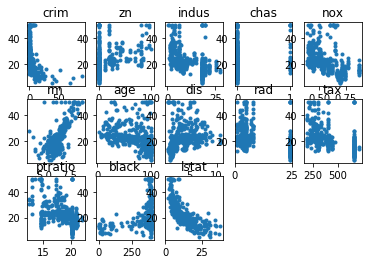

In [47]:
# INPUT::
# 1. crim: per capita crime rate by town.
# 2. zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. indus: proportion of non-retail business acres per town.
# 4. chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 5. nox: nitrogen oxides concentration (parts per 10 million).
# 6. rm: average number of rooms per dwelling.
# 7. age: proportion of owner-occupied units built prior to 1940.
# 8. dis: weighted mean of distances to five Boston employment centres.
# 9. rad: index of accessibility to radial highways.
# 10. tax: full-value property-tax rate per $10,000.
# 11. ptratio: pupil-teacher ratio by town.
# 12. black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 13. lstat: lower status of the population (percent).

# TARGET::
# medv: median value of owner-occupied homes in $1000s.

boston_housing = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
                  'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
'''

plot 방법 시험!

'''
for i in range(13):
    plt.subplot(3,5,i+1)
    plt.plot(x_train[:,i], y_train, '.')
    plt.title(boston_housing[i])
plt.show()

### ***make the highest price!

In [20]:
#model predict 모델 사용하기
#** reshape: 그냥 list는 13개 숫자인데 (1,13)으로 만들어줘야한다.
model.predict(np.array([0, 90, 0, 1, 0, 
                        100, 0, 10, 0, 250, 
                        13, 300, 0, 10, 90, 0, 1, 0, 
                        100, 0, 10, 0, 250, 
                        13, 300, 0]).reshape(2,13)) #첫번째값이 0인 이유는 crim의 plot을 봤을 때, 0에 가까울 때 집값이 높기 때문이다.

array([[274.68948],
       [273.34348]], dtype=float32)

In [17]:
a =np.array([0, 90, 0, 1, 0, 
                        100, 0, 10, 0, 250, 
                        13, 300, 0])
a.reshape(1,13)

array([[  0,  90,   0,   1,   0, 100,   0,  10,   0, 250,  13, 300,   0]])

### make the lowest price!

In [21]:
model.predict(np.array([100, 10, 25, 0, 1, 
                        50, 100, 0, 25, 700, 
                        23, 0, 30]).reshape(1,13))

array([[111.95201]], dtype=float32)